In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hoggorm as ho
import hoggormplot as hopl
np.bool = np.bool_
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, aes, labs, geom_point, geom_text

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\marth\AppData\Local\Temp/ipykernel_14340/3597664378.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import the dataset with the physical properties of the brick samples
data = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Data\murstein_labdata_v3.xlsx")

In [3]:
data

,Project ID,Brick ID,Type,Length mm,Width mm,Height mm,Volume cm3,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR,Weight (group mean)
0,1,A1_1,M,221,106,66,1463,1920.000000,10.200000,0.720000,2.300000,406,17.3,0.568716,3.04
1,1,A2_1,M,221,106,66,1477,1950.000000,9.500000,0.710000,2.100000,523,22.3,0.527635,3.04
2,1,A3_1,M,221,111,66,1469,1938.000000,9.700000,0.720000,2.200000,513,21.9,0.551049,3.04
3,1,B1_1,M,233,113,61,1510,1882.000000,13.000000,0.990000,1.900000,1998,80.9,0.725091,3.04
4,1,B2_1,M,228,106,57,1324,2135.000000,6.800000,0.950000,1.100000,1945,80.5,0.466683,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,TP6,H,227,105,61,1077,2103.342618,7.323533,0.761708,0.847493,1571,66.0,0.333385,2.20
59,9,TP7,H,227,105,60,1015,2157.832512,6.711716,0.785256,0.537025,1202,50.0,0.266680,2.20
60,9,TP8,H,227,105,61,1015,2143.054187,7.006252,0.791688,0.654500,1623,68.0,0.298866,2.20
61,9,TP9,H,228,107,61,1024,2096.582031,7.457264,0.791790,0.573865,1178,48.0,0.286090,2.20


In [3]:
# Retrieve only the integer datavalues, for correlation matrix
int_data = data.iloc[:,3:]
int_data = int_data.drop(labels=["Volume cm3", "Weight (group mean)", "Height mm", "Length mm", "Width mm"], axis=1)
sc = StandardScaler()
#sc.fit(int_data)
df_sc = pd.DataFrame(sc.fit_transform(int_data),columns = int_data.columns)
df_sc


,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR
0,-0.006809,-0.250127,-0.872119,0.267764,-1.485172,-1.341981,-0.009236
1,0.120276,-0.373363,-0.967231,0.138163,-1.321761,-1.188185,-0.151253
2,0.069442,-0.338153,-0.872119,0.202963,-1.335728,-1.200489,-0.070310
3,-0.167784,0.242815,1.695902,0.008562,0.738329,0.614306,0.531354
4,0.903967,-0.848701,1.315455,-0.509840,0.664306,0.602002,-0.361963
...,...,...,...,...,...,...,...
58,0.769861,-0.756532,-0.475426,-0.673465,0.141951,0.155993,-0.822773
59,1.000689,-0.864243,-0.251453,-0.874649,-0.373421,-0.336154,-1.053373
60,0.938086,-0.812390,-0.190278,-0.798526,0.214578,0.217512,-0.942109
61,0.741222,-0.732989,-0.189308,-0.850777,-0.406941,-0.397673,-0.986273


In [4]:
# Get the values from the data frame
data_vals= df_sc.values
col_names = list(df_sc.columns)
row_names = list(data["Brick ID"])
group_names = np.unique(list(data["Project ID"]))
project_ids = list(data["Project ID"])
types = list(data["Type"])
# see if it possible to colour by group id's

In [5]:
model = ho.nipalsPCA(arrX=data_vals, numComp=5, Xstand=False, cvType=["loo"])

loo


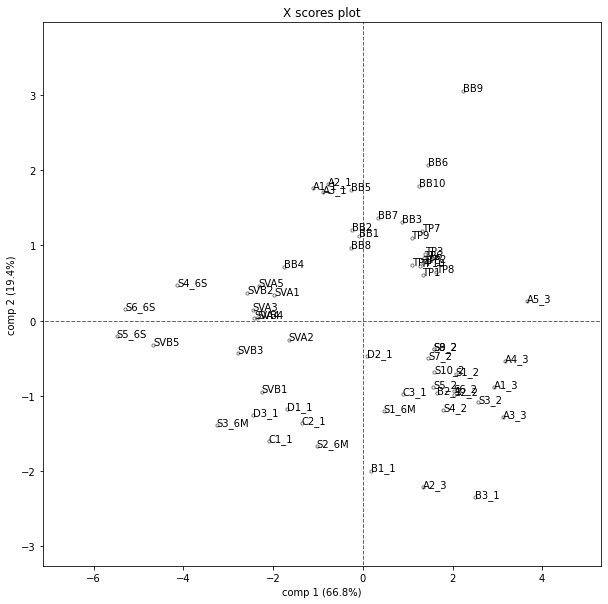

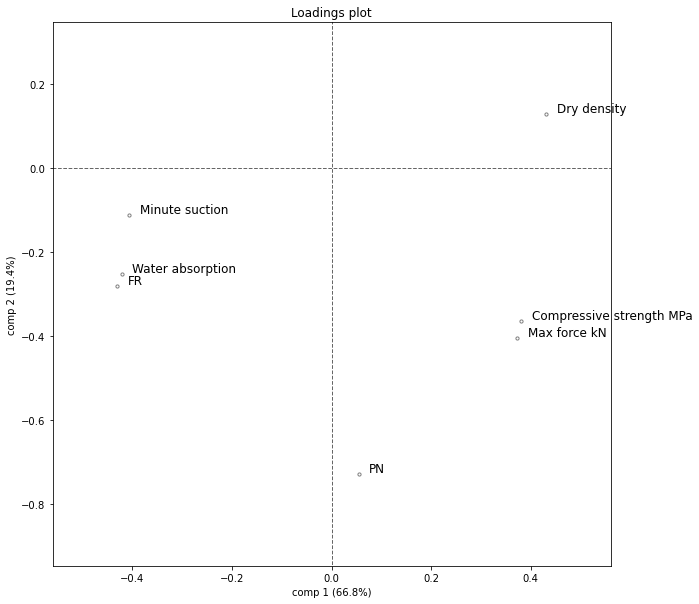

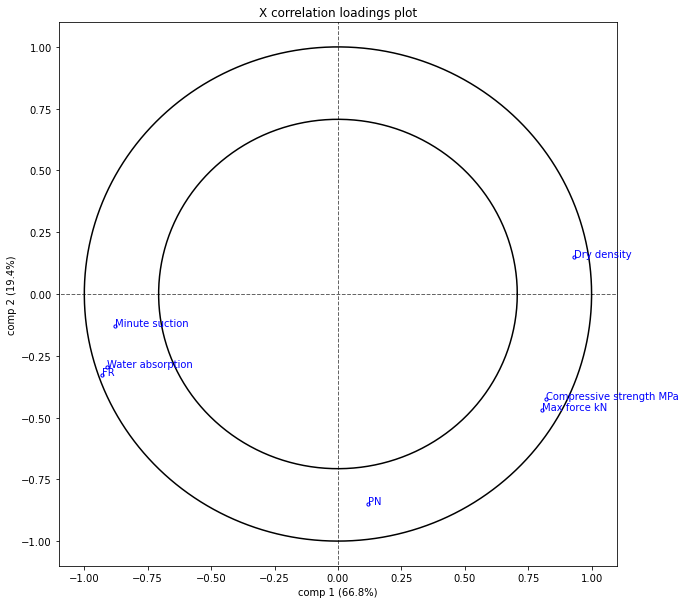

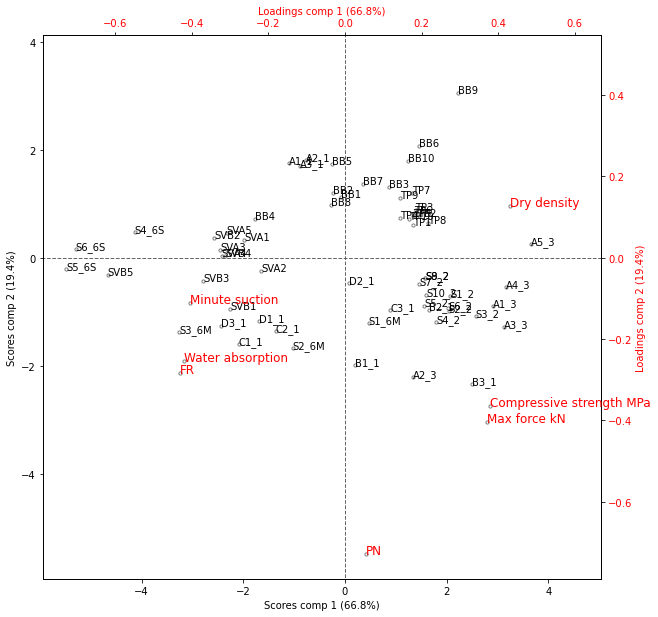

In [14]:
hopl.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4], 
         objNames=row_names, 
         XvarNames=col_names, figsize=(10,10))

In [15]:
loadings = model.X_loadings()
scores = model.X_scores()

scores_df = pd.DataFrame(model.X_scores())
scores_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_scores().shape[1])]
scores_df["Brick"]=row_names
scores_df["Brick string"] =scores_df["Brick"].astype('string')
scores_df["Project ID"]=project_ids
scores_df['Project ID string'] = scores_df['Project ID'].astype('string')
scores_df['Type'] = types

scores_df['Type'] = np.where(scores_df['Type']=='M', 1, 2)

loadings_df = pd.DataFrame(model.X_loadings()) 
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df["Variable"] = col_names

In [10]:
scores_df

,PC1,PC2,PC3,PC4,PC5,Brick,Brick string,Project ID,Project ID string,Type
0,-1.111821,1.761044,0.677251,0.304114,-0.082708,A1_1,A1_1,1,1,1
1,-0.777167,1.810031,0.566704,0.282640,-0.063653,A2_1,A2_1,1,1,1
2,-0.879840,1.705397,0.596965,0.314451,-0.084605,A3_1,A3_1,1,1,1
3,0.192775,-1.992165,0.354311,0.026156,-0.141979,B1_1,B1_1,1,1,1
4,1.657758,-0.957798,0.761315,0.442527,-0.115341,B2_1,B2_1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
58,1.365288,0.829011,0.101105,0.007589,0.063044,TP6,TP6,9,9,2
59,1.324720,1.198288,0.854028,0.010225,0.077563,TP7,TP7,9,9,2
60,1.629413,0.652707,0.318205,0.013993,0.090325,TP8,TP8,9,9,2
61,1.086458,1.101147,0.845368,-0.130455,-0.031039,TP9,TP9,9,9,2


In [11]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,Variable
0,0.430888,0.127612,0.256343,0.447314,0.728285,Dry density
1,-0.421836,-0.252654,-0.099130,-0.479345,0.635294,Water absorption
2,0.054224,-0.728497,0.639697,0.077840,-0.170033,PN
3,-0.406088,-0.111807,-0.299841,0.721384,-0.059111,Minute suction
4,0.371915,-0.404389,-0.446916,-0.015068,-0.014426,Max force kN
5,0.380033,-0.365224,-0.467872,-0.030935,0.052993,Compressive strength Mpa
6,-0.431041,-0.282407,-0.081898,0.206159,0.174873,FR


In [43]:
def biplot_lab(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(20,20))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
      
    # The score plot
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=170, c=scores_df["Project ID"], cmap='tab10', edgecolor='black', label=scores_df["Project ID"])
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=30, fontweight="bold")
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=30, fontweight="bold")
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower left", title="Brick groups", fontsize=25, title_fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    ax1.add_artist(legend1)
    
    # Sample id's plotted
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, data["Brick ID"][i], color='black', ha='right', va='top', fontsize=15)
    
    # The axis for the loadings
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')
    
    # The loadings
    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red', s=100)
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=30, fontweight="bold")
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=30, fontweight="bold")
    
    # Plot name of loadings
    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=25, fontweight="bold")
    #plt.title(f'Biplot - Brick properties - PC{c1} and PC{c2}', fontsize=30)
    #plt.grid()
    
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tick_params(axis='both', which='major', length=10, width=3)
    plt.show()

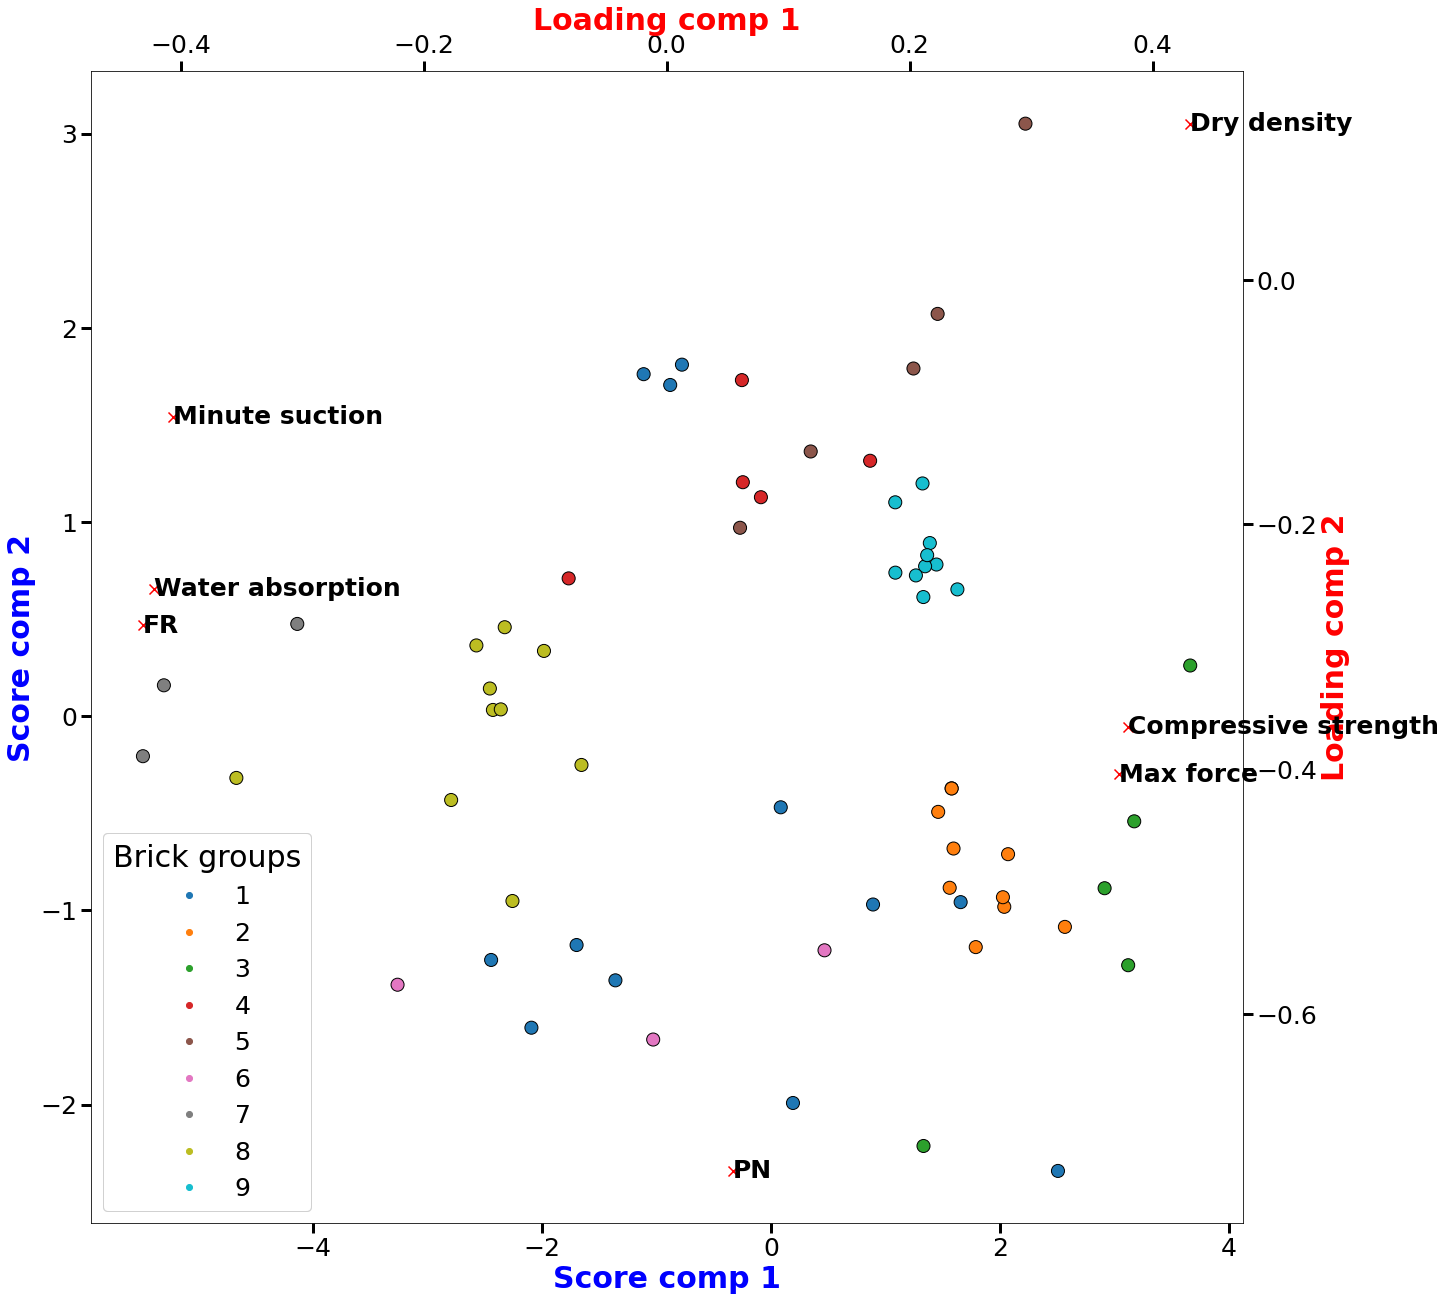

In [44]:
biplot_lab(scores, 0, 1, loadings, labels=["Dry density", "Water absorption", "PN", "Minute suction", "Max force", "Compressive strength", "FR"])

In [36]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,66.759891
PC2,19.394493
PC3,9.189385
PC4,4.185951
PC5,0.251295
